In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('Combined_News_DJIA.csv', encoding = "ISO-8859-1")

In [2]:
import warnings
warnings.filterwarnings('ignore')

Data Cleaning

Steps:
1. Check for missing data
1. Rename the Column Header
2. Remove punctuation Marks and Html tags
3. Lower the case
4. Join the 25 news headlines columns to create a single BOW for each date row
5. Check if the data is imbalanced

In [5]:
#drop empty columns
print(df.isna().sum())
df= df.dropna(axis=0, how='any')

df=df.reset_index(drop=True)
print(len(df))
data=df.iloc[:,2:27]


Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64
1986


In [6]:
# Renaming column names for ease of access
list1= range(25)
data.columns = list1

In [7]:
#removing punctuations
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

#remove character tags
punctuation = "b"
for i in range(0,25):
    for j in range(len(data)):
        data.iloc[j,i]=' '.join([x.strip(punctuation) for x in data.iloc[j,i].split()])  


In [8]:
#joining all the headlines
headlines = []
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))
df['merge_headline'] = headlines
df['merge_headline'].head()

0     Georgia downs two Russian warplanes as countr...
1     Why wont America and Nato help us If they won...
2     Remember that adorable year old who sang at t...
3     U S refuses Israel weapons to attack Iran rep...
4     All the experts admit that we should legalise...
Name: merge_headline, dtype: object

In [9]:
#check the 
df.Label.value_counts()

Label
1    1062
0     924
Name: count, dtype: int64

Text(0, 0.5, 'Count')

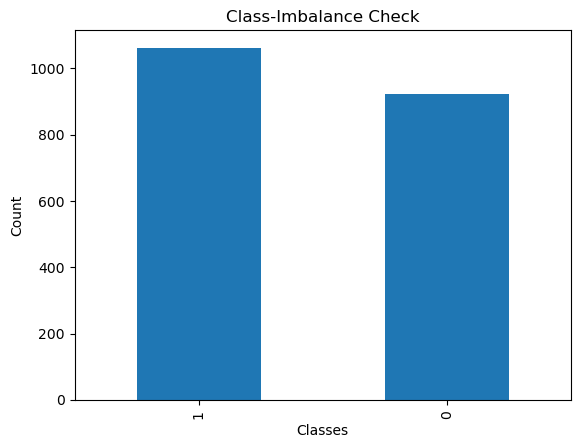

In [10]:
df.Label.value_counts().plot(kind="bar")
plt.title("Class-Imbalance Check")
plt.xlabel("Classes")
plt.ylabel("Count")

In [11]:
from gensim.utils import simple_preprocess
# Tokenize the text column to get the new column 'tokenized_text'
df['merge_headline'] = [simple_preprocess(line, deacc=True) for line in df['merge_headline'] ] 
df['merge_headline']= df['merge_headline'].apply(lambda x: " ".join(x) )
df['merge_headline']

ImportError: cannot import name 'triu' from 'scipy.linalg' (C:\Users\HP\anaconda3\Lib\site-packages\scipy\linalg\__init__.py)

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Load stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords and tokenize
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words and token.isalpha()]  # Ensure to remove non-alphabetic tokens
    return filtered_tokens

# Apply the function to remove stopwords and tokenize each sentence
df['merge_headline'] = df['merge_headline'].apply(remove_stopwords)


In [ ]:

from nltk.stem import PorterStemmer

# Define a stemmer
stemmer = PorterStemmer()

# Define a function to apply stemming to a text
def apply_stemming(text):
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Apply the function to the text column
df['merge_headline'] = df['merge_headline'].apply(apply_stemming)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
basictrain = CountVectorizer().fit(df['merge_headline'])
basictrain.get_feature_names_out()


In [ ]:
len(basictrain.get_feature_names())

In [ ]:
all_words = ' '.join([text for text in df['merge_headline']]) 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

In [ ]:
up_words =' '.join([text for text in df['merge_headline'][df['Label'] == 0]]) 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(up_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
down_words =' '.join([text for text in df['merge_headline'][df['Label'] == 1]]) 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(down_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df['merge_headline'],df['Label'],test_size=0.3,random_state=42)

In [ ]:
basictrain_1 = CountVectorizer().fit(X_train)
basictrain_1.get_feature_names_out()[::2000]

In [ ]:
len(basictrain_1.get_feature_names_out())

In [ ]:
X_train_vector = basictrain_1.transform(X_train)
X_train_vector

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=3000)
model.fit(X_train_vector, y_train)
predictions_train = model.predict(X_train_vector)
print('Accuracy Score when threshold is defualt(0.5) train:', accuracy_score(y_train, predictions_train))
predictions_test = model.predict(basictrain_1.transform(X_test))
print('Accuracy Score when threshold is defualt(0.5) test:', accuracy_score(y_test, predictions_test))


In [ ]:
bow_vector = CountVectorizer(max_df=0.95, min_df=0.05)
bow_X_train= bow_vector.fit(X_train)
len(bow_vector.get_feature_names_out())

In [ ]:
X_bow_train_vector = bow_vector.transform(X_train)
X_bow_train_vector.shape

In [ ]:
bow_vector.vocabulary_

In [ ]:
word_list = bow_vector.get_feature_names() 
count_list = X_bow_train_vector.toarray().sum(axis=0)


In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary of the word counts
word_counts = dict(zip(word_list, count_list))

# Sort the words by their counts in descending order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# Create a bar chart of the top 20 words
top_words = list(sorted_word_counts.keys())[:20]
word_counts = [sorted_word_counts[word] for word in top_words]

plt.bar(top_words, word_counts)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Create a dictionary of the word counts
word_counts = dict(zip(word_list, count_list))

# Sort the words by their counts in descending order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# Create a bar chart of the top 20 words
top_words = list(sorted_word_counts.keys())[-20:]
word_counts = [sorted_word_counts[word] for word in top_words]

plt.bar(top_words, word_counts)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Count')
plt.show()

In [ ]:

model.fit(X_bow_train_vector, y_train)
predictions_train = model.predict(X_bow_train_vector)
print('Accuracy Score when threshold is defualt(0.5) train:', accuracy_score(y_train, predictions_train))
predictions_test = model.predict(bow_vector.transform(X_test))
print('Accuracy Score when threshold is defualt(0.5) test:', accuracy_score(y_test, predictions_test))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test,predictions_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
feature_names = np.array(bow_vector.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer( max_df=0.95, min_df=0.05)
tfidf_X_train = tfidf_vector.fit(X_train)
tfidf_X_train_vector =tfidf_vector.transform(X_train)
len(tfidf_vector.get_feature_names_out())

In [ ]:
model.fit(tfidf_X_train_vector, y_train)
predictions_test = model.predict(tfidf_vector.transform(X_test))
predictions_train = model.predict(tfidf_vector.transform(X_train))

print('Accuracy Score when threshold is defualt(0.5) train:', accuracy_score(y_train, predictions_train))
print('Accuracy Score when threshold is defualt(0.5) test:', accuracy_score(y_test, predictions_test))



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector_1 = TfidfVectorizer(max_df=0.95, min_df=0.05, ngram_range=(1,2) )
tfidf_X_train_1 = tfidf_vector_1.fit(X_train)
tfidf_X_train_vector_1 =tfidf_vector_1.transform(X_train)
len(tfidf_vector_1.get_feature_names_out())

In [ ]:
model.fit(tfidf_X_train_vector_1, y_train)
predictions_test = model.predict(tfidf_vector_1.transform(X_test))
predictions_train = model.predict(tfidf_vector_1.transform(X_train))
print('Accuracy Score when threshold is defualt(0.5) train:', accuracy_score(y_train, predictions_train))
print('Accuracy Score when threshold is defualt(0.5) test:', accuracy_score(y_test, predictions_test))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test,predictions_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(model,tfidf_X_train_vector_1, y_train,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Dimension Reduction Using Lasso

In [ ]:
accuracies_1 = []
accuracies_2 = []
Cs = []
C_range =np.logspace(np.log10(0.1), np.log10(100), num=50)
# loop through each value of C and fit a logistic regression model
for C in C_range:
    # create a logistic regression model with L1 regularization and the given value of C
    logistic_lasso = LogisticRegression(penalty='l1', solver='saga', C=C, max_iter=5000)
    logistic_lasso.fit(tfidf_X_train_vector_1, y_train)
    
    # evaluate the accuracy of the model on the validation set
    acc_train = logistic_lasso.score(tfidf_X_train_vector_1, y_train)
    acc_test = logistic_lasso.score(tfidf_vector_1.transform(X_test), y_test)
    # append the accuracy and C values to the lists
    accuracies_1.append(acc_train)
    accuracies_2.append(acc_test)
    Cs.append(C)
    

In [ ]:
# plot the accuracies versus the C values
plt.plot(Cs, accuracies_1)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

In [ ]:
logistic_lasso = LogisticRegression(penalty='l1', solver='saga', C=3, max_iter=5000)
logistic_lasso.fit(tfidf_X_train_vector_1, y_train)
var_names = tfidf_vector_1.get_feature_names()
count_list = tfidf_X_train_vector_1.toarray().sum(axis=0)
variables_of_interest = []
variables_coeff = []
count = []
for beta in range(len(logistic_lasso.coef_[0])):
    if logistic_lasso.coef_[0][beta] !=0:
        variables_of_interest.append(var_names[beta])
        variables_coeff.append(logistic_lasso.coef_[0][beta])
        count.append(count_list[beta])
variable = pd.DataFrame(
    {'variables_of_interest': variables_of_interest,
     'variables_coeff': variables_coeff,
     'count_list': count
     
    })

count_list = tfidf_X_train_vector_1.toarray().sum(axis=0)

variable.sort_values('variables_coeff')

In [ ]:
vocabulary = tfidf_vector_1.vocabulary_

# Create a list of indices to keep based on the variables_of_interest
keep_indices = [vocabulary[word] for word in variables_of_interest if word in vocabulary]

# Create a new transformed document-term matrix with only the selected features
X_train_selected = tfidf_X_train_vector_1[:, keep_indices]
X_test_vector =  tfidf_vector_1.transform(X_test)[:, keep_indices]
X_train_selected.shape
X_test_vector.shape

In [ ]:
logistic_lasso.fit(X_train_selected, y_train)
predictions_test = logistic_lasso.predict(X_test_vector)
predictions_train = logistic_lasso.predict(X_train_selected)
print('Accuracy Score when threshold is defualt(0.5) train:', accuracy_score(y_train, predictions_train))
print('Accuracy Score when threshold is defualt(0.5) test:', accuracy_score(y_test, predictions_test))



In [ ]:
print('important features count', sum(logistic_lasso.coef_[0]!=0))


In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train_selected, y_train)
predictions_test = MNB.predict(X_test_vector)
predictions_train = MNB.predict(X_train_selected)
print('Accuracy Score when threshold is defualt(0.5) train:', accuracy_score(y_train, predictions_train))
print('Accuracy Score when threshold is defualt(0.5) test:', accuracy_score(y_test, predictions_test))


In [ ]:
prediction =MNB.predict_proba(X_test_vector)
pd.DataFrame(prediction, columns=MNB.classes_)

In [ ]:

from sklearn.datasets import make_classification
alphas = {'alpha': np.logspace(-3, 3, 7)}
grid = GridSearchCV(MNB, alphas, cv=5)
grid.fit(X_train_selected, y_train)
# plot alpha vs accuracy
plt.semilogx(alphas['alpha'], grid.cv_results_['mean_test_score'])
plt.title('Alpha vs Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB(alpha =0.01)
MNB.fit(X_train_selected, y_train)
predictions_test = MNB.predict(X_test_vector)
predictions_train = MNB.predict(X_train_selected)
print('Accuracy Score when threshold is defualt(0.5) train:', accuracy_score(y_train, predictions_train))
print('Accuracy Score when threshold is defualt(0.5) test:', accuracy_score(y_test, predictions_test))


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test,predictions_test)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate':[0.001],
              'max_depth': [1,3,5,7],
              'n_estimators':[100,200,300,400,500, 600]}

# Create a gradient boosting classifier object
gb = GradientBoostingClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(gb, param_grid=param_grid, cv=5)
grid_search.fit(tfidf_X_train_vector_1, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)



In [ ]:
# Evaluate the final model on the test set
final_model = grid_search.best_estimator_
test_accuracy = final_model.score(tfidf_vector_1.transform(X_test), y_test)
print("Test set accuracy: ", test_accuracy)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


k_values = range(1, 10)

accuracy_scores = []

for k in k_values:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(tfidf_X_train_vector_1, y_train)
    y_pred = knn.predict(tfidf_X_train_vector_1)
    accuracy = accuracy_score(y_train, y_pred)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores as a function of k
plt.plot(k_values, accuracy_scores)
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy as a function of k')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(tfidf_X_train_vector_1, y_train)
y_pred = knn.predict(tfidf_vector_1.transform(X_test))
accuracy = accuracy_score(y_test, y_pred)
accuracy


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz,  plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import tree

In [ ]:
#### Fitting classification trees
criteria = "gini" 
max_depth = 6 
min_sample_leaf = 4
clf_gini = DecisionTreeClassifier(criterion=criteria, random_state=100,
                                max_depth=max_depth, min_samples_leaf=min_sample_leaf)
clf_gini.fit(tfidf_X_train_vector, y_train)
print(clf_gini.score(tfidf_X_train_vector, y_train))

#### Fitting classification trees (ERROR)
# one attractive feature of a tree is visulization. 
plt.figure(figsize=(5,10))  # customize according to the size of your tree
plot_tree(clf_gini, feature_names= tfidf_X_train_vector)
plt.show()


In [ ]:
y_pred_train = clf_gini.predict(tfidf_X_train_vector)
cm = pd.DataFrame(confusion_matrix(y_train, y_pred_train).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print("Train Accuracy is ", accuracy_score(y_train,y_pred_train)*100)
y_pred = clf_gini.predict(tfidf_vector.transform(X_test))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index=['No', 'Yes'], columns=['No', 'Yes'])
print("Test Accuracy is ", accuracy_score(y_test,y_pred)*100)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#### Bagging

In [ ]:
#### Bagging and random forests 
all_features = tfidf_X_train_vector.shape[1]
all_features

In [ ]:
regr_bagging = RandomForestClassifier(max_features=743, random_state=1)


In [ ]:
regr_bagging.fit(tfidf_X_train_vector, y_train)
y_pred_train = regr_bagging.predict(tfidf_X_train_vector)
#### Bagging and random forests 
y_pred = regr_bagging.predict(tfidf_vector.transform(X_test))

In [ ]:
print("Train Accuracy is ", accuracy_score(y_train,y_pred_train)*100)

In [ ]:
print("Test Accuracy is ", accuracy_score(y_test,y_pred)*100)

In [ ]:
regr_rf = RandomForestClassifier(max_features=27,n_estimators=100, random_state=1)
regr_rf.fit(tfidf_X_train_vector, y_train)
y_pred = regr_rf.predict(tfidf_vector.transform(X_test))
y_pred_train = regr_rf.predict(tfidf_X_train_vector)
print("Train Accuracy is ", accuracy_score(y_train,y_pred_train)*100)
print("Test Accuracy is ", accuracy_score(y_test,y_pred)*100)

In [ ]:


regr_rf = RandomForestClassifier(max_features=i,n_estimators=100, random_state=1)
regr_rf.fit(tfidf_X_train_vector, y_train)
y_pred = regr_rf.predict(tfidf_vector.transform(X_test))
y_pred_train = regr_rf.predict(tfidf_X_train_vector)
print("")
print("Train Accuracy is ", accuracy_score(y_train,y_pred_train)*100)
print("Test Accuracy is ", accuracy_score(y_test,y_pred)*100)



In [ ]:
feature =[]
trees = []